In [1]:
from sklearn.linear_model import LogisticRegressionCV
import pandas as pd
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay, auc
import matplotlib.pyplot as plt

In [2]:
# Load pickled Datasets
X_train = 'D:/Python/Hydraulic Rig Dataset/Data/X_train_pickled.pkl'
X_test = 'D:/Python/Hydraulic Rig Dataset/Data/X_test_pickled.pkl'
y_train = 'D:/Python/Hydraulic Rig Dataset/Data/y_train_pickled.pkl'
y_test = 'D:/Python/Hydraulic Rig Dataset/Data/y_test_pickled.pkl'


In [3]:
X_train = pd.read_pickle(X_train)
X_test = pd.read_pickle(X_test)
y_train= pd.read_pickle(y_train)
y_test = pd.read_pickle(y_test)


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1764, 9996)
(441, 9996)
(1764,)
(441,)


In [6]:
# Logistic Regression CV model
model = LogisticRegressionCV(cv=5, max_iter=1000, random_state= 1)
model.fit(X_train, y_train)

 # Best regularization parameter
print(f"Best C: {model.C_}")


train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate the model on the test data (test accuracy)
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Best C: [1291.54966501]
Training Accuracy: 1.00
Test Accuracy: 0.96


In [7]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Generate the classification report for the training set
report_train = classification_report(y_train, y_train_pred)
print("\nClassification Report for Training Set:\n", report_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Generate the classification report for the test set
report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report for Test Set:\n", report_test)


Classification Report for Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00       605

    accuracy                           1.00      1764
   macro avg       1.00      1.00      1.00      1764
weighted avg       1.00      1.00      1.00      1764


Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       290
           1       0.99      0.89      0.94       151

    accuracy                           0.96       441
   macro avg       0.97      0.94      0.95       441
weighted avg       0.96      0.96      0.96       441



In [8]:
#  Get predicted probabilities for the positive class
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba  = model.predict_proba(X_test)[:, 1]

#  Compute ROC curve metrics
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba, pos_label=1)
fpr_test,  tpr_test,  _ = roc_curve(y_test,  y_test_proba,  pos_label=1)

#  Compute AUC scores
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test,  tpr_test)

print(f"Train ROC AUC: {auc_train:.3f}")
print(f"Test  ROC AUC: {auc_test:.3f}")


Train ROC AUC: 1.000
Test  ROC AUC: 0.986


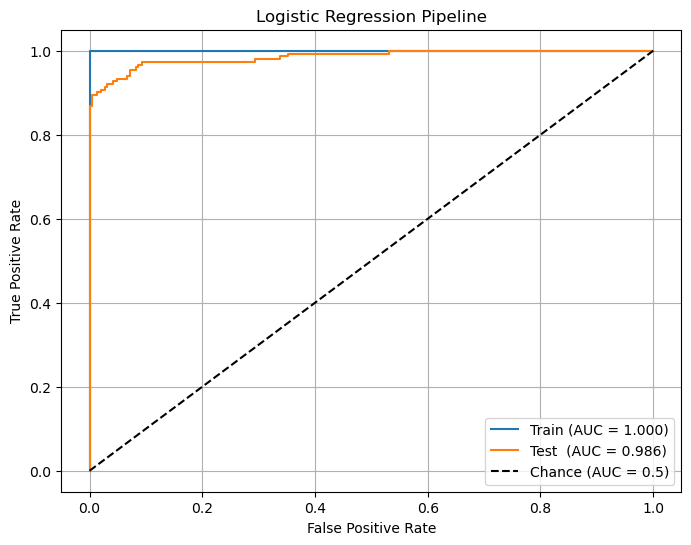

In [9]:
#  Plot both curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train (AUC = {auc_train:.3f})")
plt.plot(fpr_test,  tpr_test,  label=f"Test  (AUC = {auc_test:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression Pipeline")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()